<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/Python_Learning_Day_15_Linier_algebra%2C_Vector_%26_Matriks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import library yang diperlukan
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Data jumlah penduduk dan luas wilayah di setiap kecamatan Tangsel
data = {
    'kecamatan': ['Ciputat', 'Ciputat Timur', 'Pamulang', 'Serpong', 'Serpong Utara', 'Setu'],
    'penduduk': [150000, 200000, 250000, 100000, 100000, 50000],
    'luas': [15, 20, 25, 10, 10, 5]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung kepadatan penduduk
df['kepadatan'] = df['penduduk'] / df['luas']

# Membaca file GeoJSON untuk peta Tangsel
# Pastikan Anda memiliki file GeoJSON yang sesuai dengan batas administratif Tangsel
gdf = gpd.read_file('tangsel.geojson')

# Menggabungkan data dengan GeoDataFrame
merged = gdf.set_index('kecamatan').join(df.set_index('kecamatan'))

# Membuat peta dengan menggunakan GeoPandas
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='kepadatan', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Peta Kepadatan Penduduk Kota Tangerang Selatan')
ax.set_axis_off()

# Menampilkan peta
plt.show()

DataSourceError: tangsel.geojson: No such file or directory

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

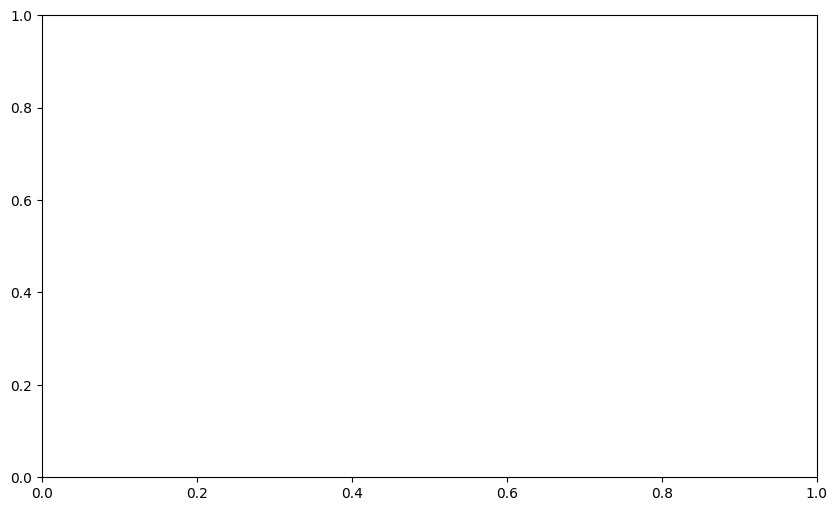

In [5]:
# Import library yang diperlukan
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon

# Data jumlah penduduk dan luas wilayah di setiap kecamatan Tangsel (data random)
data = {
    'kecamatan': ['Ciputat', 'Ciputat Timur', 'Pamulang', 'Serpong', 'Serpong Utara', 'Setu'],
    'penduduk': np.random.randint(50000, 300000, 6),
    'luas': np.random.randint(5, 30, 6)
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung kepadatan penduduk
df['kepadatan'] = df['penduduk'] / df['luas']

# Membuat geometri random untuk setiap kecamatan
# Koordinat random di sekitar Jakarta/Tangsel
np.random.seed(42)
x = np.random.uniform(106.6, 106.8, 6)
y = np.random.uniform(-6.4, -6.2, 6)
geometry = [Point(xy) for xy in zip(x, y)]

# Membuat GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Buat peta dengan menggunakan GeoPandas
fig, ax = plt.subplots(1, figsize=(10, 6))

# Plot peta Indonesia sebagai latar belakang
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
indonesia = world[world.name == 'Indonesia']
indonesia.plot(ax=ax, color='lightgrey')

# Plot kecamatan Tangsel dengan warna berdasarkan kepadatan penduduk
gdf.plot(column='kepadatan', cmap='Blues', markersize=100, linewidth=0.8, ax=ax, legend=True, legend_kwds={'shrink': 0.5})

ax.set_title('Peta Kepadatan Penduduk Kota Tangerang Selatan (Data Random)')
ax.set_axis_off()

# Menampilkan peta
plt.show()

<ipython-input-6-90be8c699d1e>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='kecamatan', y='penduduk', data=df, palette="Blues_d")


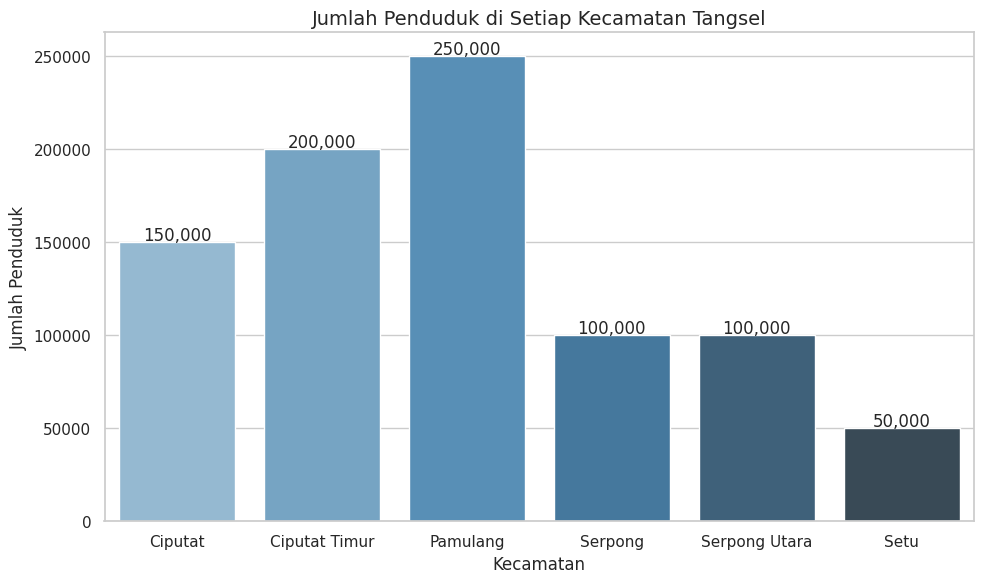

<ipython-input-6-90be8c699d1e>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  density_plot = sns.barplot(x='kecamatan', y='kepadatan', data=df, palette="Greens_d")


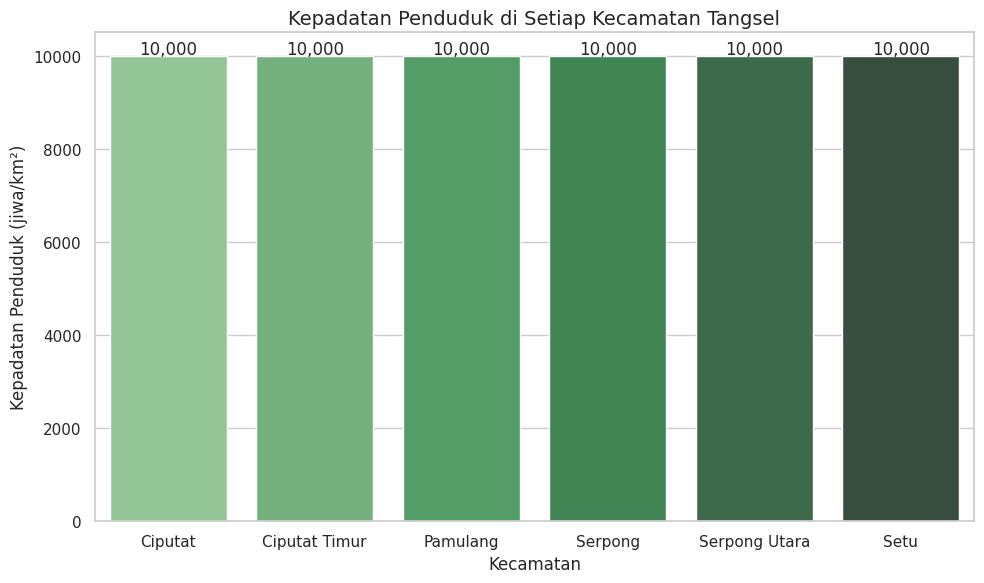

In [6]:
# Percobaan visualisasi data penduduk kota Tangsel, wilayah dan kepadatan perkecamatan

# Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data jumlah penduduk dan luas wilayah di setiap kecamatan Tangsel (data random)
data = {
    'kecamatan': ['Ciputat', 'Ciputat Timur', 'Pamulang', 'Serpong', 'Serpong Utara', 'Setu'],
    'penduduk': [150000, 200000, 250000, 100000, 100000, 50000],
    'luas': [15, 20, 25, 10, 10, 5]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung kepadatan penduduk
df['kepadatan'] = df['penduduk'] / df['luas']

# Mengatur style untuk plot
sns.set(style="whitegrid")

# Membuat plot bar untuk jumlah penduduk
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='kecamatan', y='penduduk', data=df, palette="Blues_d")

# Menambahkan judul dan label
plt.title('Jumlah Penduduk di Setiap Kecamatan Tangsel', fontsize=14)
plt.xlabel('Kecamatan', fontsize=12)
plt.ylabel('Jumlah Penduduk', fontsize=12)

# Menampilkan nilai di atas batang
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Membuat plot bar untuk kepadatan penduduk
plt.figure(figsize=(10, 6))
density_plot = sns.barplot(x='kecamatan', y='kepadatan', data=df, palette="Greens_d")

# Menambahkan judul dan label
plt.title('Kepadatan Penduduk di Setiap Kecamatan Tangsel', fontsize=14)
plt.xlabel('Kecamatan', fontsize=12)
plt.ylabel('Kepadatan Penduduk (jiwa/km²)', fontsize=12)

# Menampilkan nilai di atas batang
for p in density_plot.patches:
    density_plot.annotate(f'{int(p.get_height()):,}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

# Menampilkan plot
plt.tight_layout()
plt.show()